<a href="https://colab.research.google.com/github/sajidmeo/Awesome-Hacking/blob/master/UCimage_sattelite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
url="https://drive.google.com/drive/folders/1-1ugycbhB3Kag8lYDe0D2oKIDzO49Xlg"

In [0]:
url

'https://drive.google.com/drive/folders/1-1ugycbhB3Kag8lYDe0D2oKIDzO49Xlg'

In [0]:
!unzip -uq "/content/drive/My Drive/UCMerced_LandUse.zip" -d "/content/drive/My Drive/CMerced_LandUse"

In [0]:
from pathlib import Path
PATH = Path("/content/drive/My Drive/CMerced_LandUse/UCMerced_LandUse/Images/")
#train_path = PATH/'train'
classes = [str(f).split('/')[-1] for f in list(PATH.iterdir())]
classes


['tenniscourt',
 'intersection',
 'mediumresidential',
 'mobilehomepark',
 'overpass',
 'parkinglot',
 'river',
 'runway',
 'sparseresidential',
 'storagetanks',
 'agricultural',
 'airplane',
 'baseballdiamond',
 'beach',
 'buildings',
 'chaparral',
 'denseresidential',
 'forest',
 'freeway',
 'golfcourse',
 'harbor',
 'models']

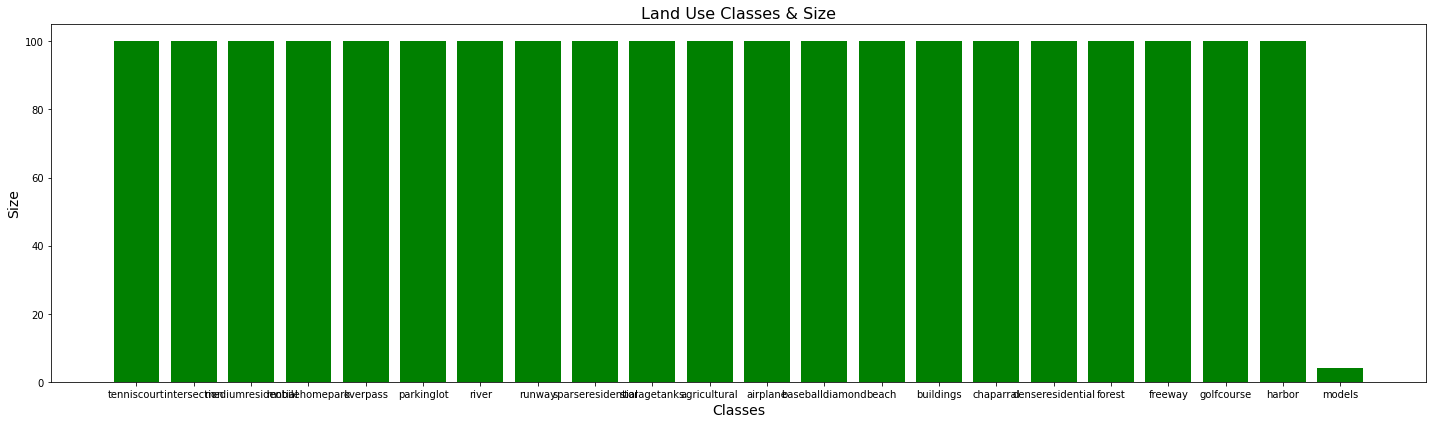

In [0]:
import matplotlib.pyplot as plt
files = []

for i in classes:
    paths =PATH/i
    files.append(list(paths.iterdir())[0])
classes_num = {}
for i in classes:
   
    folders = PATH/i
    classes_num[i] = len(list(folders.iterdir()))
    #print(f'{i} class has {len(list(folders.iterdir()))}')
plt.figure(figsize=(20,6))
plt.bar(classes_num.keys(), classes_num.values(), color='green')
plt.title('Land Use Classes & Size', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Size', fontsize=14)
plt.tight_layout()

In [0]:
   from fastai.imports import *

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
#np.random.seed(42)
data = ImageDataBunch.from_folder(PATH, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [0]:
data

ImageDataBunch;

Train: LabelList (1680 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
agricultural,agricultural,agricultural,agricultural,agricultural
Path: /content/drive/My Drive/CMerced_LandUse/UCMerced_LandUse/Images;

Valid: LabelList (420 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
airplane,sparseresidential,storagetanks,sparseresidential,forest
Path: /content/drive/My Drive/CMerced_LandUse/UCMerced_LandUse/Images;

Test: None

In [0]:
data.classes

['agricultural',
 'airplane',
 'baseballdiamond',
 'beach',
 'buildings',
 'chaparral',
 'denseresidential',
 'forest',
 'freeway',
 'golfcourse',
 'harbor',
 'intersection',
 'mediumresidential',
 'mobilehomepark',
 'overpass',
 'parkinglot',
 'river',
 'runway',
 'sparseresidential',
 'storagetanks',
 'tenniscourt']

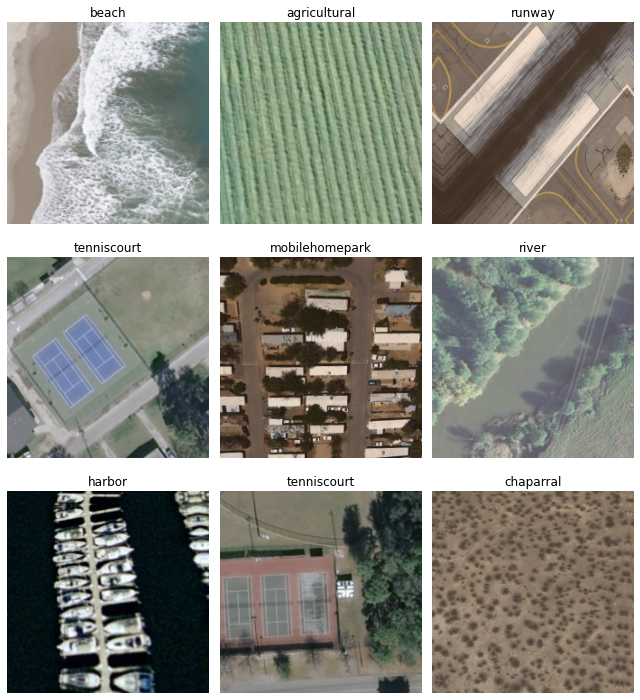

In [0]:
data.show_batch(rows=3, figsize=(9,10))

In [0]:
learn = cnn_learner(data, models.resnet18)
learn.fit(1)
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


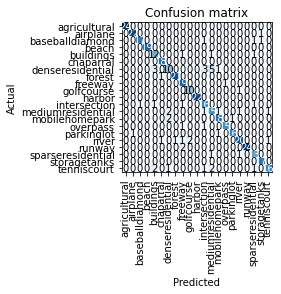

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.confusion_matrix()

array([[24,  0,  0,  0, ...,  0,  0,  0,  0],
       [ 0, 22,  0,  0, ...,  0,  0,  1,  0],
       [ 0,  0, 17,  0, ...,  0,  1,  1,  0],
       [ 0,  0,  0, 19, ...,  0,  0,  0,  0],
       ...,
       [ 0,  0,  0,  0, ..., 24,  0,  0,  0],
       [ 0,  0,  0,  0, ...,  0, 13,  0,  0],
       [ 0,  0,  0,  0, ...,  0,  0, 17,  0],
       [ 0,  0,  0,  0, ...,  0,  1,  0, 16]])

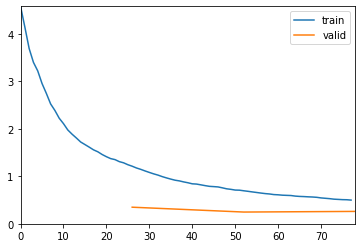

In [0]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy, callback_fns=ShowGraph)
learn.fit(3)

Second_model

In [0]:
learner = cnn_learner(data, models.resnet18, metrics=[accuracy])
#learner.fit_one_cycle(5,1e-3)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [0]:
learner.save('uc_satteliteimage')

In [0]:
learner.path

PosixPath('/content/drive/My Drive/CMerced_LandUse/UCMerced_LandUse/Images')

In [0]:
img = learner.data.train_ds[0][0]
learner.predict(img)

(Category freeway,
 tensor(8),
 tensor([7.1941e-02, 2.2977e-03, 1.1052e-01, 8.4054e-04, 1.8014e-03, 6.6014e-05,
         3.6005e-04, 4.3925e-04, 3.7257e-01, 1.3445e-04, 1.5797e-03, 4.6259e-04,
         3.8355e-05, 2.0758e-04, 3.0235e-03, 1.7342e-04, 7.2288e-02, 3.5461e-01,
         2.0580e-03, 2.6228e-03, 1.9677e-03]))

In [0]:
preds,y,losses = learner.get_preds(with_loss=True)
interp = ClassificationInterpretation(learner, preds, y, losses)

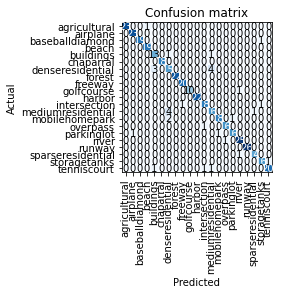

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.confusion_matrix()

array([[23,  0,  0,  1, ...,  0,  0,  0,  0],
       [ 0, 23,  0,  0, ...,  0,  0,  0,  0],
       [ 0,  0, 19,  0, ...,  0,  0,  1,  0],
       [ 0,  0,  0, 19, ...,  0,  0,  0,  0],
       ...,
       [ 0,  0,  0,  0, ..., 26,  0,  0,  0],
       [ 0,  0,  0,  0, ...,  0, 14,  0,  0],
       [ 0,  0,  0,  0, ...,  0,  0, 16,  1],
       [ 0,  0,  0,  0, ...,  0,  0,  0, 20]])

In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


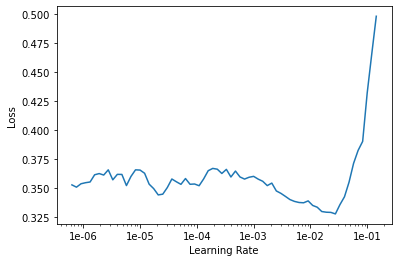

In [0]:
learner.recorder.plot()

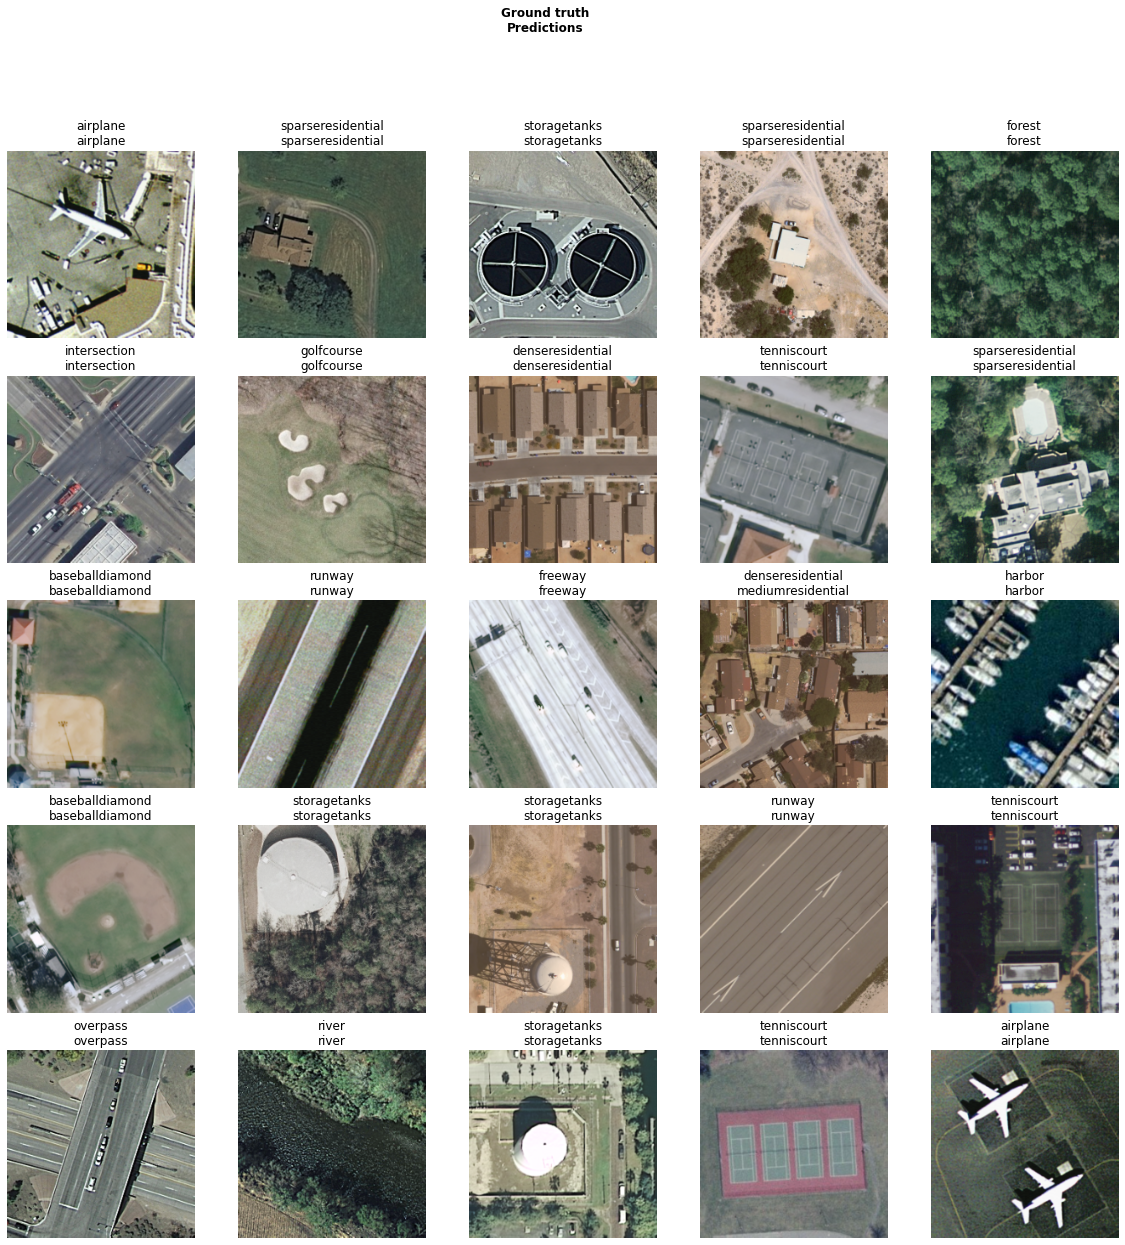

In [0]:
learner.show_results()


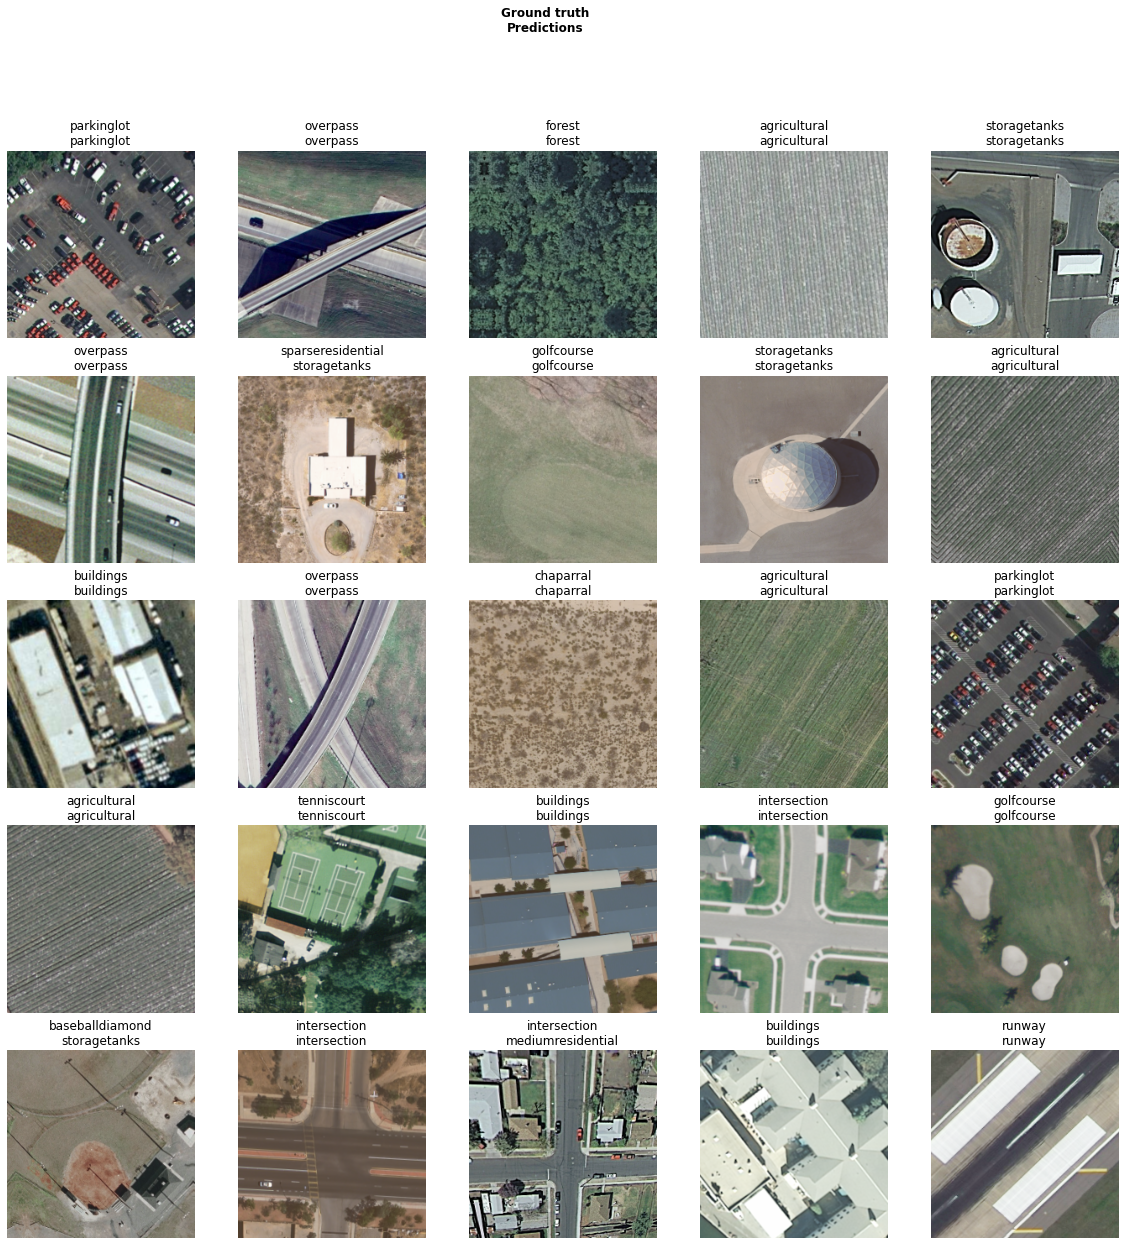

In [0]:
learner.show_results(ds_type=DatasetType.Train)

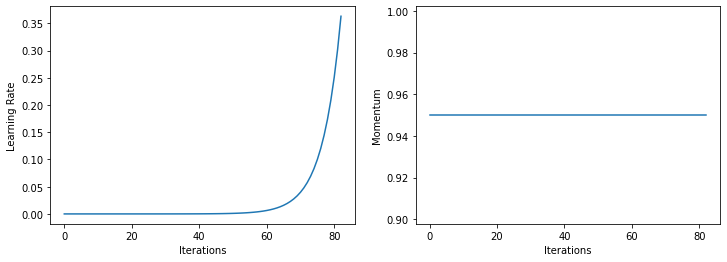

In [0]:
learner.recorder.plot_lr(show_moms=True)

In [0]:
data = learner.data.train_ds[0][0]

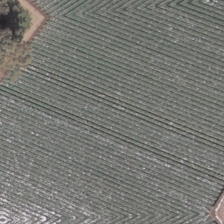

In [0]:
data

In [0]:
pred = learn.predict(data)
pred

(Category agricultural,
 tensor(0),
 tensor([9.9802e-01, 5.6357e-09, 4.1645e-05, 6.6175e-07, 4.8396e-07, 3.8126e-07,
         1.7942e-10, 2.5243e-06, 1.4853e-05, 1.6188e-03, 2.5893e-08, 7.1222e-08,
         9.4138e-10, 4.7137e-09, 2.4596e-06, 6.2780e-08, 2.1435e-05, 2.5623e-04,
         7.7202e-06, 1.1595e-05, 2.8945e-07]))

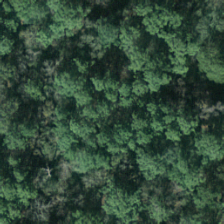

In [0]:
pre_data=learner.data.valid_ds[4][0]
pre_data

In [0]:
predata=learner.predict(pre_data)

In [0]:
predata

(Category forest,
 tensor(7),
 tensor([3.1775e-05, 1.0695e-06, 7.3016e-07, 8.3331e-06, 2.8095e-07, 5.0816e-04,
         4.3055e-07, 9.9929e-01, 2.8040e-06, 2.9741e-05, 6.5512e-06, 2.2282e-07,
         1.3538e-05, 2.8357e-06, 2.9886e-07, 1.3234e-05, 8.7759e-05, 3.8024e-07,
         2.7635e-07, 1.3125e-07, 7.0756e-07]))

In [0]:
learner.freeze()

In [0]:
learner.fit_one_cycle(3)

In [0]:
learner.unfreeze()
# optionally, separate LR and WD for each group
learner.fit_one_cycle(3, max_lr=(1e-4, 1e-3, 1e-2), wd=(1e-4,1e-4,1e-1))

In [0]:
learner.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

In [0]:
learner.save("image_sattelite_final")

In [0]:
learner.save("image_sattelite_final", return_path=True)

PosixPath('/content/drive/My Drive/CMerced_LandUse/UCMerced_LandUse/Images/models/image_sattelite_final.pth')

In [0]:
learner = learner.load("image_sattelite_final")

In [0]:
mydata=learner.data.valid_ds[17][0]
print(mydata)


Image (3, 224, 224)


In [0]:
print(learner.predict(mydata))

(Category parkinglot, tensor(15), tensor([8.3641e-07, 2.8058e-07, 1.3454e-08, 1.9322e-09, 3.7304e-07, 2.2139e-07,
        9.4512e-06, 3.3872e-07, 1.9823e-08, 9.0987e-10, 2.3530e-08, 4.6577e-06,
        2.8394e-08, 5.6133e-06, 8.7979e-09, 9.9998e-01, 8.4436e-09, 6.9302e-08,
        2.6347e-10, 1.4080e-08, 2.9334e-06]))


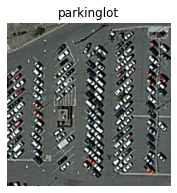

In [0]:
mydata.show(y=learner.predict(mydata)[0])

In [0]:
learner.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

In [0]:
learner.export()

In [0]:
learner.export("uc_sattelite.pkl")